In [1]:
from scipy.io import loadmat
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.losses import Loss
from cal_error import ExpectedCalibrationError
import time 
from matplotlib import pyplot as plt

In [2]:
import sys
sys.path.insert(1, '/home/thlarsen/ood_detection')

from helper import load_mnist_c, load_mnist_model, rgb_img_to_vec
from cal_error import ExpectedCalibrationError


In [7]:
data, labels, sev = load_mnist_c('contrast')
step = 10000
mnist_by_sev = {}
for i in range(0, data.shape[0], step): 
    mnist_by_sev[sev[i]] = [data[i:i+step], labels[i:i+step]]

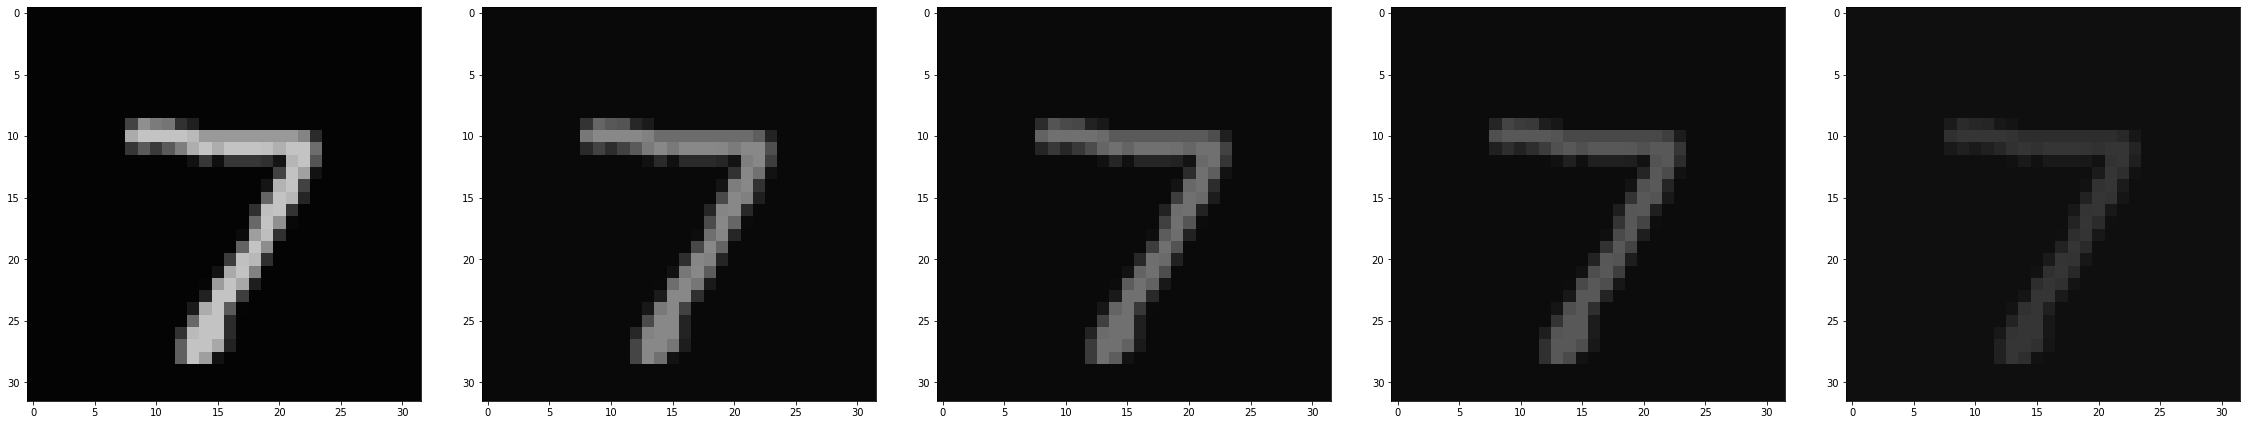

In [24]:
A=0
B=50000
x=0

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(32, 32))
fig.tight_layout(pad=3.0)

for i in range(A, A+B, 10000): 
    
#     print(f'label={labels[i]}, sev={sev[i]}')
    axes[x].imshow(data[i])
#     axes[x].title.set_text(f'sev={sev[i]}')
#     ax.set_title(f'sev={sev[i]}', fontdict={'fontsize': 15, 'fontweight': 'medium'})
#     axes.set_fontsize(20)

    x+=1
#     plt.show()
    

In [25]:
model = load_mnist_model() 

In [26]:
acc_fn = keras.metrics.SparseCategoricalAccuracy()
ece = ExpectedCalibrationError()

In [30]:
acc = []
ece = []

acc_fn = keras.metrics.Accuracy()
ECE = ExpectedCalibrationError()

for sev in mnist_by_sev.keys(): 
    data_s, labels_s = mnist_by_sev[sev]
    data_s = rgb_img_to_vec(data_s)

    preds = model.predict(np.reshape(data_s, (-1, 1024)))
    acc.append(acc_fn(labels_s, tf.argmax(preds, axis=1)))
    ece.append(ECE.call(labels_s, preds))
    print(f" acc = {acc[-1]}")
    print(f" ece = {ece[-1]}")


 acc = 0.9185000061988831
 ece = 0.0017815070459619164
 acc = 0.8673499822616577
 ece = 0.029295194894075394
 acc = 0.7985666394233704
 ece = 0.027109820395708084
 acc = 0.712149977684021
 ece = 0.006289280951023102
 acc = 0.6095399856567383
 ece = 0.01703735999763012


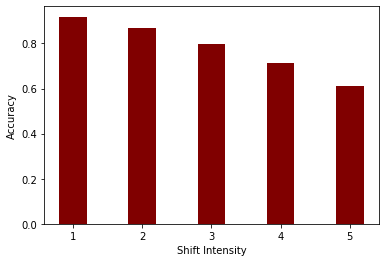

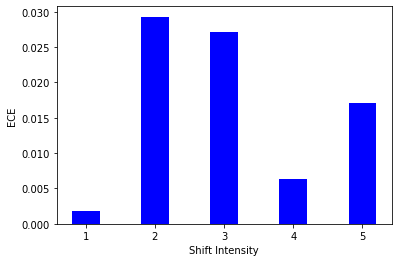

In [34]:

plt.bar(range(1, 6), acc, color ='maroon',
        width = 0.4)
 
plt.xlabel("Shift Intensity")
plt.ylabel("Accuracy")
# plt.title("Students enrolled in different courses")
plt.show()

# plot.plot(range(5), ece)
plt.bar(range(1, 6), ece, color ='blue',
        width = 0.4)
 
plt.xlabel("Shift Intensity")
plt.ylabel("ECE")
# plt.title("Students enrolled in different courses")
plt.show()

# for sev in range(5): 
    
#     print(f'label={labels[i]}, sev={sev[i]}')
#     axes[x].imshow(data[i])
#     axes[x].title.set_text(f'sev={sev[i]}')
#     ax.set_title(f'sev={sev[i]}', fontdict={'fontsize': 15, 'fontweight': 'medium'})
#     axes.set_fontsize(20)

#     x+=1
#     plt.show()